# Árbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

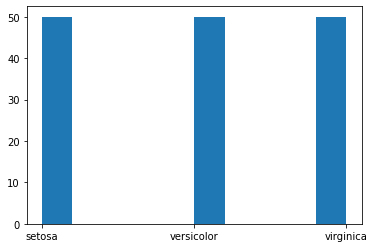

In [4]:
plt.hist(data.Species)

In [5]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [6]:
import numpy as np

In [7]:
data["is_train"] = np.random.uniform(0,1, len(data)) <= 0.75

In [8]:
train, test = data[data["is_train"] == True] , data[data["is_train"] == False]

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [11]:
preds = tree.predict(test[predictors])

In [12]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,16,0
virginica,0,2,10


# Visualización del árbol de desición

In [13]:
from sklearn.tree import export_graphviz

In [14]:
with open("./resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [15]:
import os
from graphviz import Source

In [16]:
file= open("./resources/iris_dtree.dot")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.583\\nsamples = 109\\nvalue = [37, 34, 38]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.998\\nsamples = 72\\nvalue = [0, 34, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 5.05\\nentropy = 0.414\\nsamples = 36\\nvalue = [0, 33, 3]"] ;\n2 -> 3 ;\n4 [label="Sepal.Length <= 4.95\\nentropy = 0.196\\nsamples = 33\\nvalue = [0, 32, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 31\\nvalue = [0, 31, 0]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 1, 35]"] ;\n2 -> 8 ;\n9 [label="entropy = 1.0\\nsamples = 2\\nvalue = [0, 1, 1]"] ;\n8 

* Si la longitud de los petalos es menor o igual a 2.45 entonces es una **Setosa** (izquierda)
    * Si no (derecha) Si la longitud de los petalos es maypr a 1.75 es una **Virginica** (derecha)
        * Si la longitud de los petalos es menor a 2.45 y 1.75 y 4.95 es una **Versicolor** (izquierda)

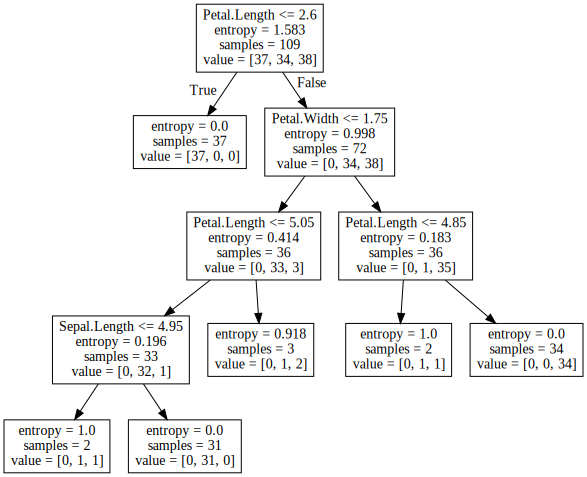

In [17]:
Source(text)

# Cross Validation para la poda

In [18]:
X = data[predictors]
Y = data[target] 

In [19]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [20]:
from sklearn.model_selection import KFold

In [21]:
#cv = KFold(n = X.shape[0], n_folds=10, shuffle=True, random_state=1) # Anterior
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [24]:
score = np.mean(scores)

In [25]:
score

0.9333333333333333

In [26]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i, " es de: ",score)
    print("     ", tree.feature_importances_)

Score para i =  1  es de:  0.5666666666666667
      [0. 0. 1. 0.]
Score para i =  2  es de:  0.9200000000000002
      [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de:  0.9400000000000001
      [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de:  0.9333333333333333
      [0.         0.         0.66869158 0.33130842]


In [27]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

# Random forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators = 1000)
forest.fit(X,Y)

RandomForestClassifier(n_estimators=1000, n_jobs=2, oob_score=True)

In [32]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [0.99728261, 0.00271739, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.9975    , 0.0025    , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.98011364, 0.01988636, 0.        ],
       [0.99470899, 0.00529101, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.9765625 , 0.0234375 , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [33]:
forest.oob_score_

0.9533333333333334